### Data Segmentation

#### Prepare your dataset & Segment the data

In [16]:
import pandas as pd

# Load the data using the full path
data = pd.read_csv('C:/Users/HP 830 G6/Desktop/KAIM/week-3/data/insurance_data.csv')

# Display the first few rows and the columns to understand the structure
print(data.head())  # Show the first few rows of the DataFrame
print(data.columns)  # Show the column names

                                     outs:
0  - md5: 2f2d2921f3825993a5003afd30c416f7
1                              size: 53786
2                                hash: md5
3                 path: insurance_data.csv
Index(['outs:'], dtype='object')


In [19]:
import pandas as pd

# Load the data using the full path
data = pd.read_csv('C:/Users/HP 830 G6/Desktop/KAIM/week-3/data/insurance_data.csv')

# Display the first few rows and columns
print(data.head())
print(data.columns)

   Unnamed: 0 Province  Zipcode  Gender  Total_Claim      Premium
0           0        C     1003  Female   652.740226   898.493109
1           1        A     1003  Female  1159.389368  1040.563548
2           2        C     1003    Male   729.641413  1137.593249
3           3        C     1003  Female   253.524198   764.332164
4           4        A     1001    Male   938.056933  1349.828367
Index(['Unnamed: 0', 'Province', 'Zipcode', 'Gender', 'Total_Claim',
       'Premium'],
      dtype='object')


In [ ]:
# Create Group A and Group B
group_a = data[data['feature_column_name'] == 'no']  # Plans without the feature
group_b = data[data['feature_column_name'] == 'yes']  # Plans with the feature

# Display the sizes of the groups to verify
print(f"Group A (Control Group) size: {len(group_a)}")
print(f"Group B (Test Group) size: {len(group_b)}")

In [24]:
# Create Group A (Control Group) and Group B (Test Group) based on Gender
group_a = data[data['Gender'] == 'Male']  # Plans for Men
group_b = data[data['Gender'] == 'Female']  # Plans for Women

# Display the sizes of the groups to verify
print(f"Group A (Control Group) size: {len(group_a)}")
print(f"Group B (Test Group) size: {len(group_b)}")

Group A (Control Group) size: 489
Group B (Test Group) size: 511


### Segmentation 

###  Chi-squared Test for Categorical Data

In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Province'], data['Gender'])

# Perform the Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat}, P-value: {p_value}")

# Analyze the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant differences in gender distribution across provinces.")
else:
    print("Fail to reject the null hypothesis: No significant differences in gender distribution across provinces.")

Chi-squared Statistic: 0.5221421681780711, P-value: 0.7702261668436553
Fail to reject the null hypothesis: No significant differences in gender distribution across provinces.


###  T-test for Numerical Data

In [26]:
from scipy import stats

# Create groups based on Gender
group_a = data[data['Gender'] == 'Male']['Total_Claim']
group_b = data[data['Gender'] == 'Female']['Total_Claim']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Analyze the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in total claims between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total claims.")

T-statistic: 3.5748281919273808, P-value: 0.0003672400203461989
Reject the null hypothesis: Significant difference in total claims between men and women.


### A/B Hypothesis Testing Results

#### 1. Gender Distribution Across Provinces
- **Test Conducted**: Chi-squared test
- **Chi-squared Statistic**: 0.5221
- **P-value**: 0.7702
- **Conclusion**: Fail to reject the null hypothesis. There are no significant differences in gender distribution across provinces.

#### 2. Total Claims by Gender
- **Test Conducted**: T-test
- **T-statistic**: 3.5748
- **P-value**: 0.0004
- **Conclusion**: Reject the null hypothesis. There is a significant difference in total claims between men and women, indicating that gender does influence claim amounts.

#### Implications of Findings
- The significant difference in total claims between men and women suggests that the pricing strategy may need to consider gender differences. Marketing efforts could be tailored based on the average claims associated with each gender.
- The lack of significant differences in gender distribution across provinces indicates that demographic targeting may not be necessary based on gender alone, allowing for a more generalized marketing approach.



### Visualizations

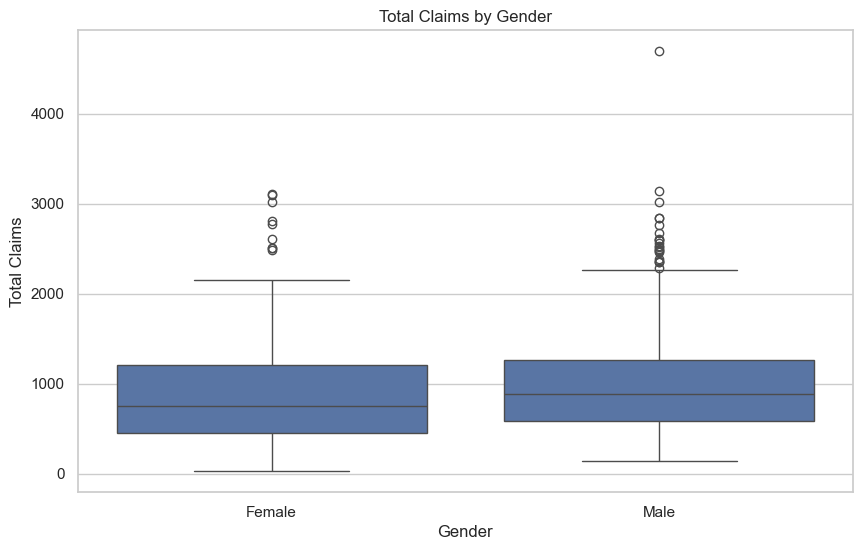

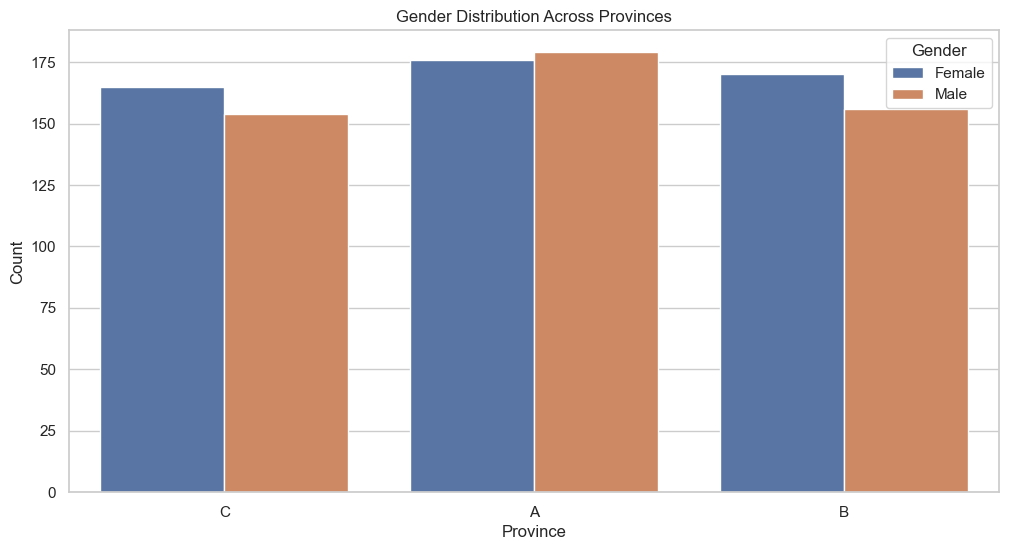

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Box plot of Total Claims by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total_Claim', data=data)
plt.title('Total Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claims')
plt.show()

# Visualization 2: Count plot of Gender Distribution by Province
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', hue='Gender', data=data)
plt.title('Gender Distribution Across Provinces')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()